In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import os
import pickle
import blosc

from pprint import pprint
import re

In [26]:
bond_angles={}

with open("cod-crest_bond_angles.pkl", "rb") as f:
    compressed_pickle = f.read()

#depressed_pickle = blosc.decompress(compressed_pickle)
bond_angles.update(pickle.loads(compressed_pickle))

In [27]:
len(bond_angles)

1451

In [28]:
for key in bond_angles.keys():
    print(key)

Car - O - Nar
Car - Nar - Car
Car - O - Car
Nar - Car - Nar
Car - Car - Nar
Car - Car - Car
Car - H - Car
Car - Car - H
C - Nar - Nar
C - Car - Nar
Car - Nar - Nar
C - Nar - Car
C - Car - Car
Car - Car - Npl
H - Car - Npl
H - H - Npl
C - Car - H
C - H - H
C - Nar - H
C - O - C
C - C - C
C - C - H
C - O - O
C - C - O
C - O - H
Car - F - Car
C - Car - Nam
C - O - Nam
C - Car - O
Car - H - Nam
H - C - Nam
Car - C - Nam
Car - Nam - Car
C - F - F
C - Car - F
Car - O - Ntr
Ntr - O - O
Car - Ntr - Car
Car - C - Car
C - F - Ntr
C - Ntr - C
C - F - C
Ntr - C - O
C - C - Car
Car - Car - O
C - O - Ntr
C - Ntr - H
C - C - N
C - N - H
N - C - O
HO - N - O
C - O - Car
Car - Car - S
Car - S - Nar
Car - S - Car
B - C - N
C - N - C
B - N - Car
B - C - Car
B - N - C
C - B - N
B - C - C
C - B - H
Car - B - Car
C - Car - C
Car - Cl - Car
Car - Car - Cl
C - Car - N
C - N - O
C - O - N
C - N - Car
C - Npl - N
C - N - Npl
C - Npl - Car
C - Npl - C
N - C - Npl
C - Nam - C
C - C - Nam
C - Nam - H
C - Nam - O
C

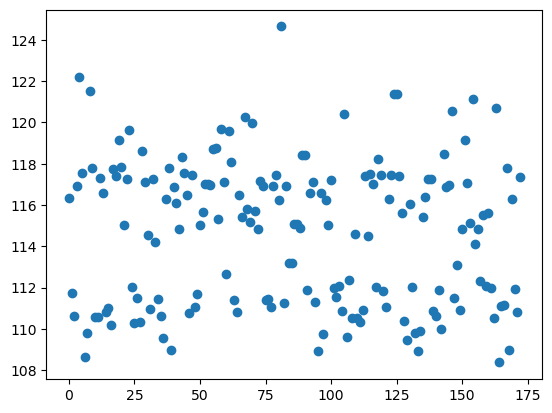

In [31]:
plt.scatter(np.arange(len(bond_angles['N - C - O'])), bond_angles['N - C - O'][:,0])

In [19]:
max(bond_angles['N - C - O'])

145.06

In [20]:
min(bond_angles['N - C - O'])

106.462

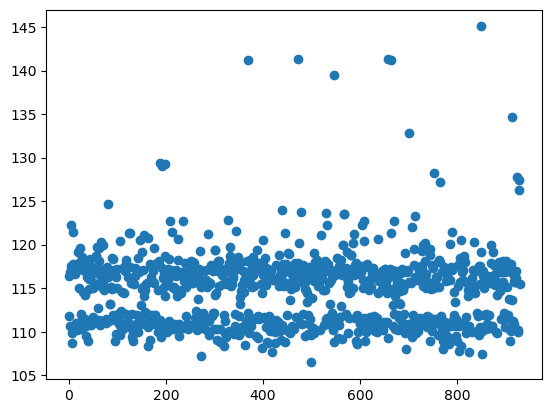

In [25]:
plt.scatter(np.arange(len(bond_angles['N - C - O'])), bond_angles['N - C - O'])